In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
start_date = "2019-12-31"
tickers = ["BIL", "IEF", "SPY", "USIG", "USHY", "EPU"] #BIL etf letra de tesoro seguro, IEF etf bono 10 años seguro, SPY etf del sp500, USIG etf bonos grado de inversion, USHY etf bonos high yield
                                                       # EPU etf renta variable Peru
                                                       #  

In [3]:
df = yf.download(tickers, start=start_date, auto_adjust=False)["Adj Close"]
df

[*********************100%***********************]  6 of 6 completed


Ticker,BIL,EPU,IEF,SPY,USHY,USIG
Date,,,,,,
2019-12-31,79.227371,29.586916,96.983101,296.632385,29.039026,47.810528
2020-01-02,79.253365,29.738647,97.431870,299.406403,29.152067,47.917141
2020-01-03,79.253365,29.499077,98.082993,297.139282,29.123819,48.015537
2020-01-06,79.244667,29.531015,97.977425,298.272797,29.109694,47.966339
2020-01-07,79.244667,29.411230,97.836639,297.434174,29.081440,47.892536
...,...,...,...,...,...,...
2025-08-29,91.447998,53.799999,95.835999,645.049988,37.415001,51.449001
2025-09-02,91.470001,54.910000,95.550003,640.270020,37.360001,51.310001
2025-09-03,91.480003,56.009998,95.879997,643.739990,37.455002,51.529999


In [ ]:
for i in tickers:    # recorre la lista de tickers
    df["ret_diario_"+i]=df[i].pct_change() #Nueva columna: retorno = (precio_t / precio_{t-1}) - 1
df    


Ticker,BIL,EPU,IEF,SPY,USHY,USIG,ret_diario_BIL,ret_diario_IEF,ret_diario_SPY,ret_diario_USIG,ret_diario_USHY,ret_diario_EPU
Date,,,,,,,,,,,,
2019-12-31,79.227371,29.586916,96.983101,296.632385,29.039026,47.810528,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,79.253365,29.738647,97.431870,299.406403,29.152067,47.917141,0.000328,0.004627,0.009352,0.002230,0.003893,0.005128
2020-01-03,79.253365,29.499077,98.082993,297.139282,29.123819,48.015537,0.000000,0.006683,-0.007572,0.002053,-0.000969,-0.008056
2020-01-06,79.244667,29.531015,97.977425,298.272797,29.109694,47.966339,-0.000110,-0.001076,0.003815,-0.001025,-0.000485,0.001083
2020-01-07,79.244667,29.411230,97.836639,297.434174,29.081440,47.892536,0.000000,-0.001437,-0.002812,-0.001539,-0.000971,-0.004056
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-29,91.447998,53.799999,95.835999,645.049988,37.415001,51.449001,0.000436,-0.000831,-0.005964,-0.002125,-0.001062,0.007113
2025-09-02,91.470001,54.910000,95.550003,640.270020,37.360001,51.310001,0.000241,-0.002984,-0.007410,-0.002702,-0.001470,0.020632
2025-09-03,91.480003,56.009998,95.879997,643.739990,37.455002,51.529999,0.000109,0.003454,0.005420,0.004288,0.002543,0.020033


In [ ]:
for i in tickers:  # Recorre la lista de simbolos
    df["ret_diario_acumulado_"+i]=(1+df["ret_diario_"+i]).cumprod()-1  #retorno acumulado (crecimiento de 1 unidad) desde el inicio hasta cada fecha
df                                                                     # acumulado hasta hoy es el producto de todos esos factores menos 1:  (1+r1​)×(1+r2​)×⋯×(1+rt​)−1
                                                                       #El producto te da el factor total (ej. 1.0599). Restar 1 lo convierte en retorno (0.0599 = 5.99%)

Ticker,BIL,EPU,IEF,SPY,USHY,USIG,ret_diario_BIL,ret_diario_IEF,ret_diario_SPY,ret_diario_USIG,ret_diario_USHY,ret_diario_EPU,ret_diario_acumulado_BIL,ret_diario_acumulado_IEF,ret_diario_acumulado_SPY,ret_diario_acumulado_USIG,ret_diario_acumulado_USHY,ret_diario_acumulado_EPU
Date,,,,,,,,,,,,,,,,,,
2019-12-31,79.227371,29.586916,96.983101,296.632385,29.039026,47.810528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,79.253365,29.738647,97.431870,299.406403,29.152067,47.917141,0.000328,0.004627,0.009352,0.002230,0.003893,0.005128,0.000328,0.004627,0.009352,0.002230,0.003893,0.005128
2020-01-03,79.253365,29.499077,98.082993,297.139282,29.123819,48.015537,0.000000,0.006683,-0.007572,0.002053,-0.000969,-0.008056,0.000328,0.011341,0.001709,0.004288,0.002920,-0.002969
2020-01-06,79.244667,29.531015,97.977425,298.272797,29.109694,47.966339,-0.000110,-0.001076,0.003815,-0.001025,-0.000485,0.001083,0.000218,0.010253,0.005530,0.003259,0.002434,-0.001889
2020-01-07,79.244667,29.411230,97.836639,297.434174,29.081440,47.892536,0.000000,-0.001437,-0.002812,-0.001539,-0.000971,-0.004056,0.000218,0.008801,0.002703,0.001715,0.001461,-0.005938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-29,91.447998,53.799999,95.835999,645.049988,37.415001,51.449001,0.000436,-0.000831,-0.005964,-0.002125,-0.001062,0.007113,0.154248,-0.011828,1.174577,0.076102,0.288439,0.818371
2025-09-02,91.470001,54.910000,95.550003,640.270020,37.360001,51.310001,0.000241,-0.002984,-0.007410,-0.002702,-0.001470,0.020632,0.154525,-0.014777,1.158463,0.073195,0.286545,0.855888
2025-09-03,91.480003,56.009998,95.879997,643.739990,37.455002,51.529999,0.000109,0.003454,0.005420,0.004288,0.002543,0.020033,0.154652,-0.011374,1.170161,0.077796,0.289816,0.893066


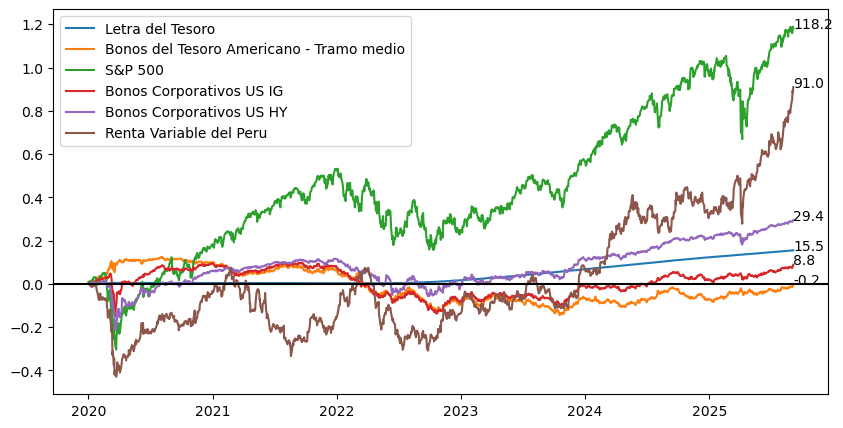

In [ ]:
# Creando el grafico
plt.figure(figsize=(10,5))
plt.plot(df.index,df["ret_diario_acumulado_BIL"],label="Letra del Tesoro")
plt.text(df.index[-1],df["ret_diario_acumulado_BIL"].iloc[-1],round(df["ret_diario_acumulado_BIL"].iloc[-1]*100,1))
plt.plot(df.index,df["ret_diario_acumulado_IEF"],label="Bonos del Tesoro Americano - Tramo medio")
plt.text(df.index[-1],df["ret_diario_acumulado_IEF"].iloc[-1],round(df["ret_diario_acumulado_IEF"].iloc[-1]*100,1))
plt.plot(df.index,df["ret_diario_acumulado_SPY"],label="S&P 500")
plt.text(df.index[-1],df["ret_diario_acumulado_SPY"].iloc[-1],round(df["ret_diario_acumulado_SPY"].iloc[-1]*100,1))
plt.plot(df.index,df["ret_diario_acumulado_USIG"],label="Bonos Corporativos US IG")
plt.text(df.index[-1],df["ret_diario_acumulado_USIG"].iloc[-1],round(df["ret_diario_acumulado_USIG"].iloc[-1]*100,1))
plt.plot(df.index,df["ret_diario_acumulado_USHY"],label="Bonos Corporativos US HY")
plt.text(df.index[-1],df["ret_diario_acumulado_USHY"].iloc[-1],round(df["ret_diario_acumulado_USHY"].iloc[-1]*100,1))
plt.plot(df.index,df["ret_diario_acumulado_EPU"],label="Renta Variable del Peru")
plt.text(df.index[-1],df["ret_diario_acumulado_EPU"].iloc[-1],round(df["ret_diario_acumulado_EPU"].iloc[-1]*100,1))
plt.legend(loc="upper left")
plt.axhline(0,color="black")
plt.show()
# el retorno total en % desde 31-dic-2019 hasta la última fecha de tu serie para cada activo
# retorno acumulado es +118.2%, el factor de crecimiento es: 1+118.2%=1+1.182=2.182 
# Precio final (ajustado) =296.63×2.182≈647.25
# Ganancia en dólares =296.63×1.182≈350.62

In [14]:
precios_ini = df[tickers].iloc[0]    # primer precio disponible de la ventana
precios_fin = df[tickers].iloc[-1]   # último precio disponible

ret_acum = precios_fin / precios_ini - 1               # retorno acumulado (decimal)
ganancia_usd = precios_fin - precios_ini                 # ganancia en $ por cada ETF (por acción)

res = (
    pd.DataFrame({
        "Precio inicial ($)": precios_ini,
        "Precio final ($)": precios_fin,
        "Ganancia ($/acción)": ganancia_usd,
        "Retorno acumulado": ret_acum
    })
    .round({"Precio inicial ($)":2,"Precio final ($)":2,"Ganancia ($/acción)":2})
)
res


,Precio inicial ($),Precio final ($),Ganancia ($/acción),Retorno acumulado
Ticker,,,,
BIL,79.23,91.53,12.30,0.155283
IEF,96.98,96.78,-0.20,-0.002094
SPY,296.63,647.24,350.61,1.181960
USIG,47.81,52.04,4.23,0.088463
USHY,29.04,37.59,8.55,0.294465
EPU,29.59,56.50,26.91,0.909628


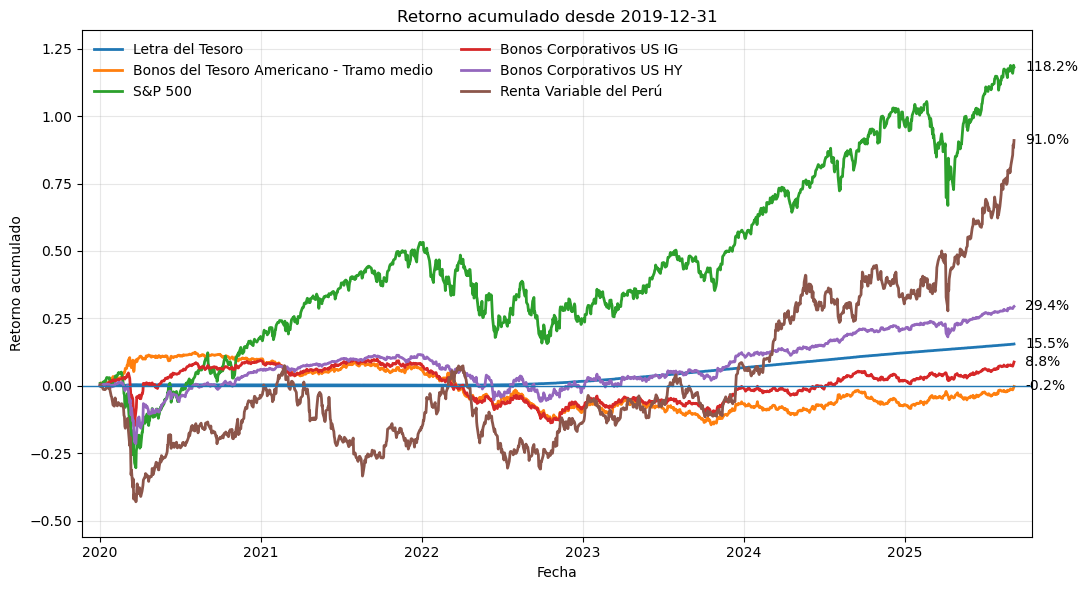

In [16]:
labels = {
    "BIL":  "Letra del Tesoro",
    "IEF":  "Bonos del Tesoro Americano - Tramo medio",
    "SPY":  "S&P 500",
    "USIG": "Bonos Corporativos US IG",
    "USHY": "Bonos Corporativos US HY",
    "EPU":  "Renta Variable del Perú",
}

prefix = "ret_diario_acumulado_"   # prefijo de tus columnas

fig, ax = plt.subplots(figsize=(11,6))

for tic, lab in labels.items():
    col = f"{prefix}{tic}"
    if col not in df.columns:
        continue
    y = df[col].dropna()
    if y.empty:
        continue

    ax.plot(y.index, y, label=lab, linewidth=2)

    # Etiqueta del último punto (desplazada un poco para que no se corte)
    ax.annotate(f"{y.iloc[-1]*100:.1f}%",
                xy=(y.index[-1], y.iloc[-1]),
                xytext=(8, 0), textcoords="offset points",
                ha="left", va="center")

# Presentación
ax.set_title(f"Retorno acumulado desde {df.index[0].strftime('%Y-%m-%d')}")
ax.set_xlabel("Fecha")
ax.set_ylabel("Retorno acumulado")
ax.axhline(0, linewidth=1)
ax.grid(True, alpha=0.3)
ax.legend(ncol=2, loc="upper left", frameon=False)
ax.margins(x=0.02, y=0.08)  # un poquito de margen para las etiquetas
fig.tight_layout()
plt.show()